In [ ]:
# !nvidia-smi
# !pip install keras
# !pip install torch
# !pip install tensorflow-gpu


In [5]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical as one_hot
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

X_train[45344]:


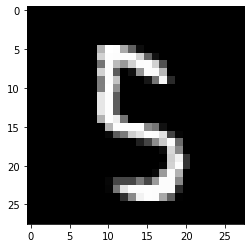

X_train[52004]:


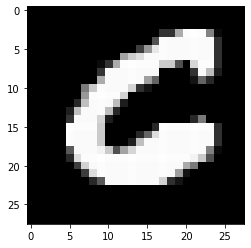

X_train[22520]:


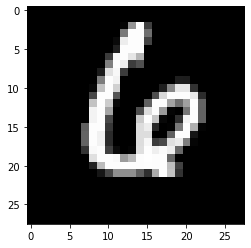

In [6]:
for i in np.random.randint(len(X_train), size=3):
    print(f"X_train[{i}]:")
    plt.imshow(X_train[i] , cmap='gray')
    plt.show()

In [7]:
# Keras expects the input data to be in the form of a 4D tensor. So, we need to reshape our data.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [8]:
# now, let us normalize the data to the range 0-1:
X_train = X_train / 255
X_test = X_test / 255
# we divide by 255 because the pixel values are in the range 0-255.

In [9]:
# one-hot encode target column because it is a classification problem
y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [25]:
# define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [27]:

model.compile(Adam(learning_rate=0.0001), loss='kullback_leibler_divergence', metrics=['accuracy'])

In [28]:
# Time to train the model!
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 [==============================] - 22s 47ms/step - loss: 0.4062 - accuracy: 0.8936 - val_loss: 0.1136 - val_accuracy: 0.9659
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1057 - accuracy: 0.9687 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0718 - accuracy: 0.9790 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0572 - accuracy: 0.9830 - val_loss: 0.0400 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0359 - val_accuracy: 0.9879
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0378 - val_accuracy: 0.9881
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0273 - val_accuracy:

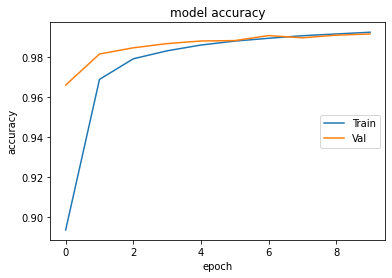

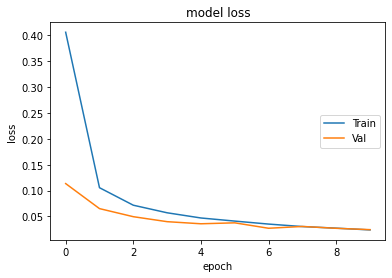

In [35]:
# Let's see how the model did:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Train","Val"], loc='center right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["Train","Val"], loc='center right')
plt.show()

In [36]:
# Time for the final test!
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % (acc*100))
print('Test Loss: %.3f' % (loss))

Test Accuracy: 99.140
Test Loss: 0.025


Filter 0 shape: (5, 1, 32)


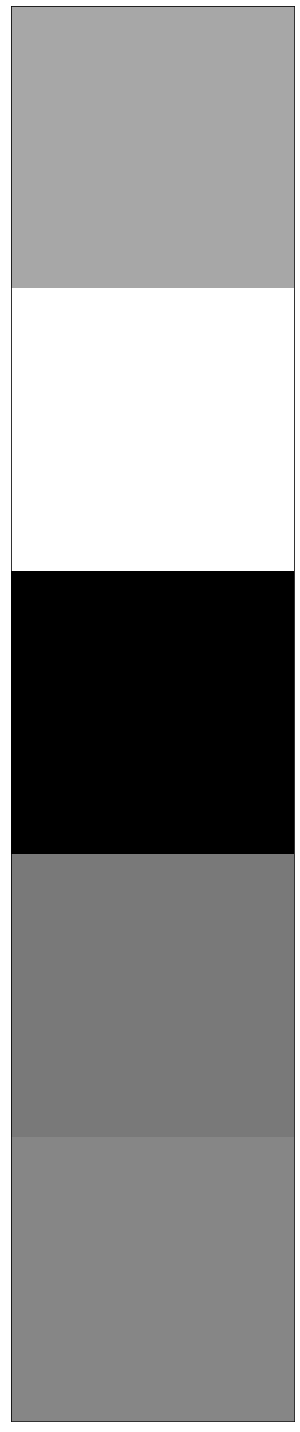

Filter 1 shape: (5, 1, 32)


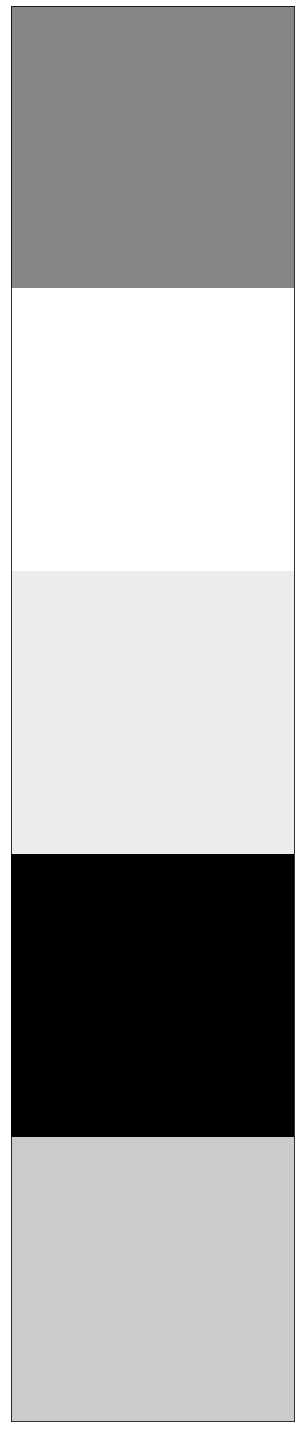

Filter 2 shape: (5, 1, 32)


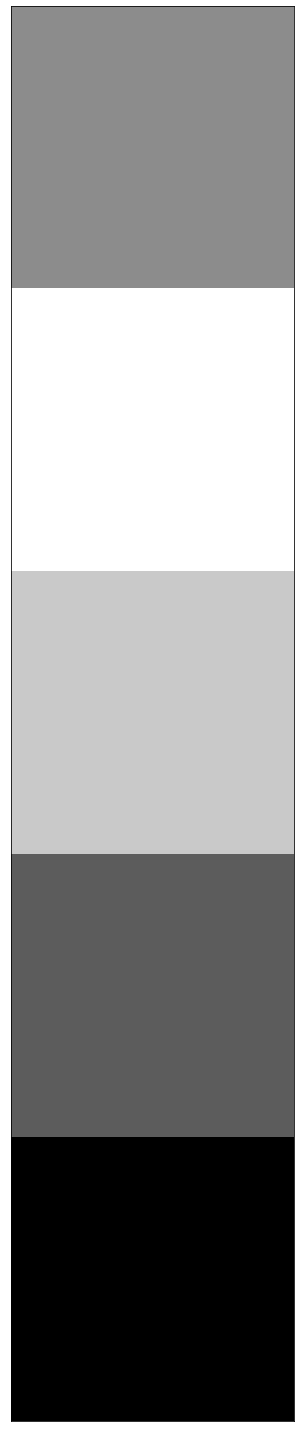

Filter 3 shape: (5, 1, 32)


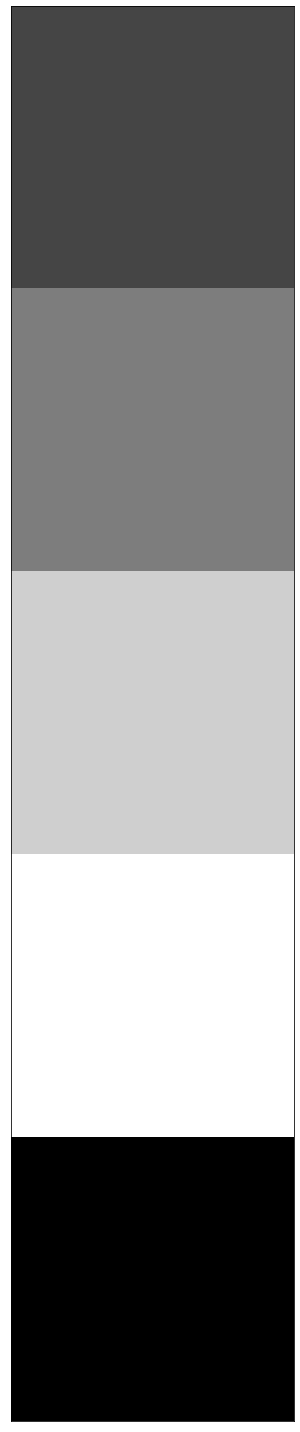

Filter 4 shape: (5, 1, 32)


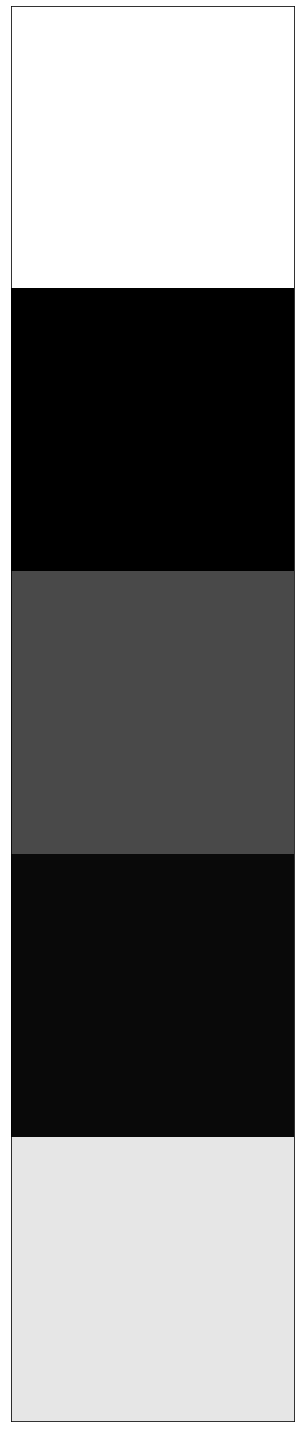

Filter 0 shape: (5, 32, 64)


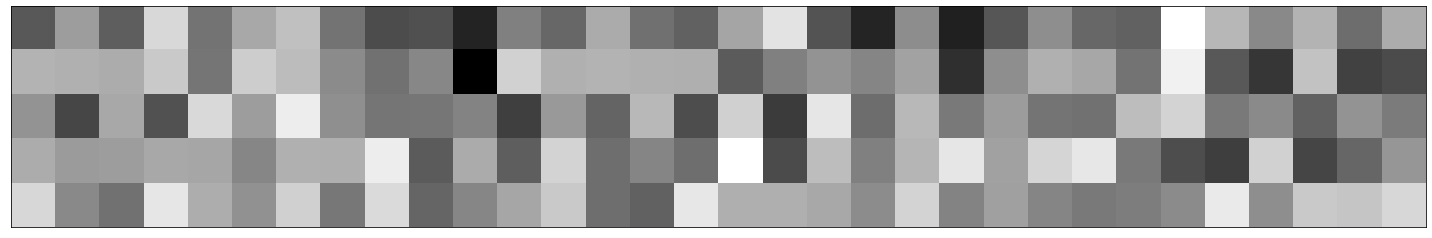

Filter 1 shape: (5, 32, 64)


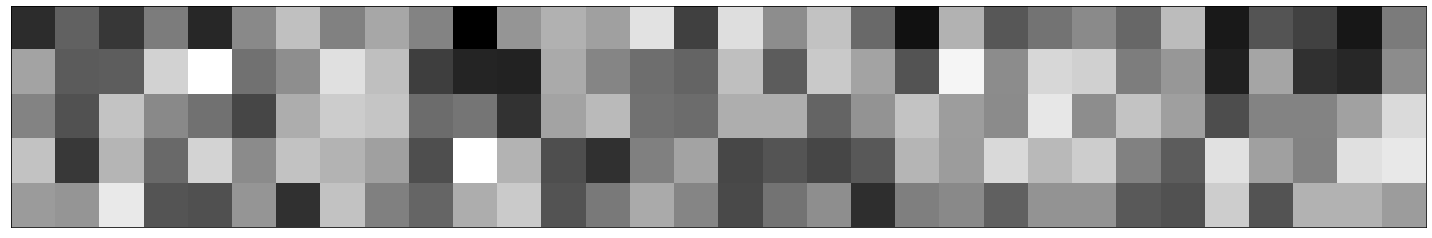

Filter 2 shape: (5, 32, 64)


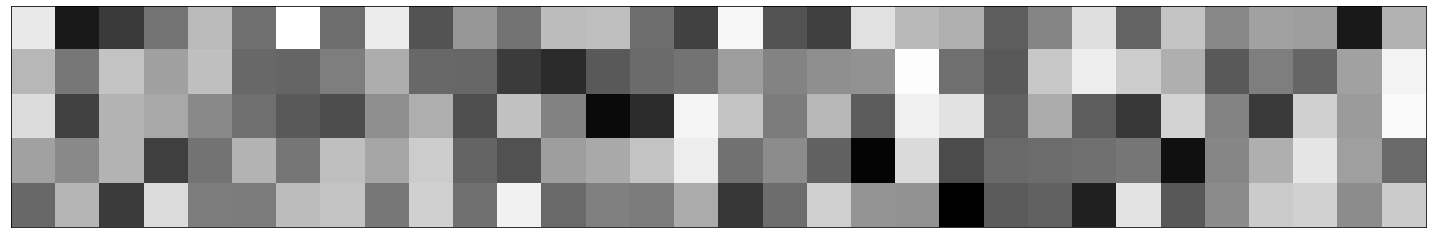

Filter 3 shape: (5, 32, 64)


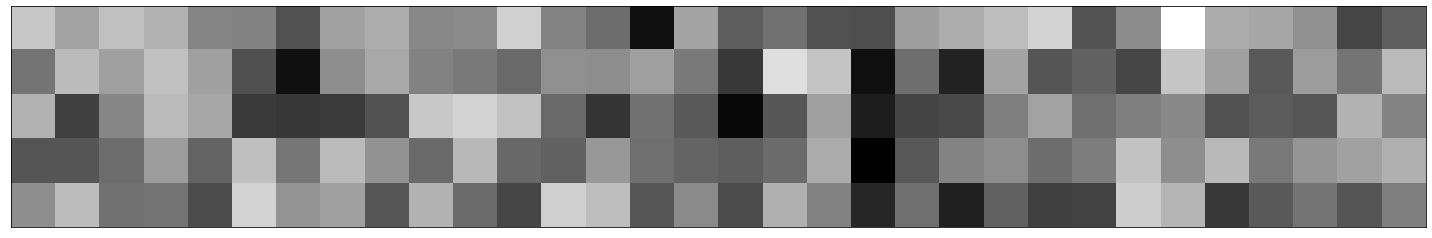

Filter 4 shape: (5, 32, 64)


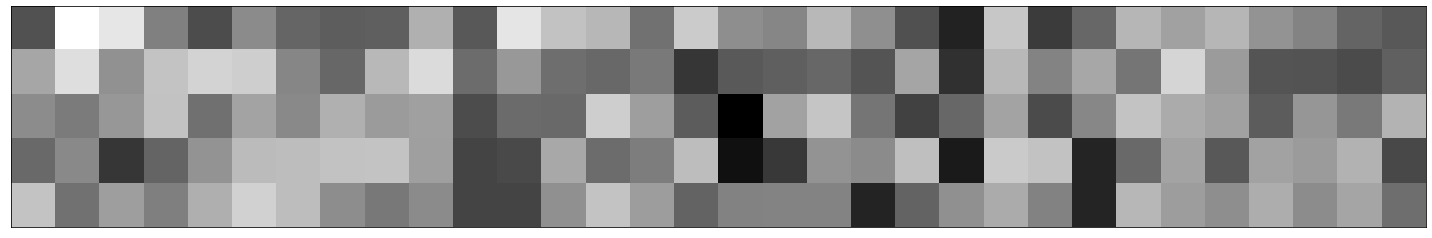

In [37]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # plot each filter shape
    for i in range(np.shape(filters)[0]):
        # get filter shape
        shape = filters[i].shape
        print(f"Filter {i} shape: {shape}")
        # plot filter as a square
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(111)
        ax.imshow(filters[i][:, :, 0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.tight_layout()
        plt.show()
    